In [6]:
import sys
sys.path.append('F:/study/ML_project/ML_AI_project_HuiShi') # --> change here

from functions import vgg16, NN, standard_scaler, read_data, cal_metrics
import numpy as np

SEED = 1
np.random.seed(SEED)
RAND_STATE = 1
root = "F:/study/ML_project/ML_AI_project_HuiShi/LISA_traffic_light_detection.v3i.multiclass" # --> change here
train_folder_path, test_folder_path, train_labels, test_labels = read_data.read_data(root) # read the dataset

In [2]:
# extract features using vgg16
# normalization_std = [0.229, 0.224, 0.225]
# normalization_mean = [0.485, 0.456, 0.406]
# mean = [0.19240434, 0.16837405, 0.20262092]
# std = [0.18612613, 0.17387361, 0.19018272]
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
features_train, labels_train, features_test, labels_test = vgg16.extract_features_and_labels(mean, std, train_folder_path, test_folder_path, train_labels,test_labels)

c:\Users\86180\miniconda3\envs\deepLearning\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\86180\miniconda3\envs\deepLearning\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). T

Epoch: 0. Trainset Accuracy: 0.09934410494320908. Precision: 0.38808373590982287. Recall: 0.13856547362368837. F1 Score: 0.19691873173374433.
Epoch: 20. Trainset Accuracy: 0.21660534314509677. Precision: 0.5900586428371963. Recall: 0.30372286905275264. F1 Score: 0.3826232901733055.
Epoch: 40. Trainset Accuracy: 0.3207486802111662. Precision: 0.6329348722176422. Recall: 0.44142590196923964. F1 Score: 0.490878363951661.
Epoch: 60. Trainset Accuracy: 0.3738601823708207. Precision: 0.6534709193245779. Recall: 0.500646830530401. F1 Score: 0.5326840435864685.
Epoch: 80. Trainset Accuracy: 0.40345544712845943. Precision: 0.6733576642335767. Recall: 0.5304010349288486. F1 Score: 0.5567802523662316.
Testset Accuracy: 0.45666666666666667. Precision: 0.6931677018633541. Recall: 0.5619335347432024. F1 Score: 0.58526623491651.
Confusion Matrix for Label go:
[[246 175]
 [148 331]]



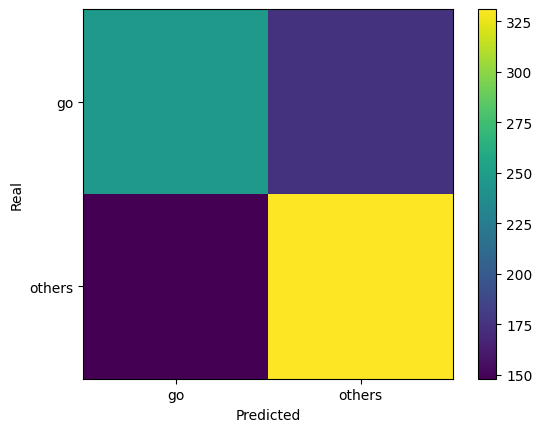

Confusion Matrix for Label stop:
[[430  72]
 [171 227]]



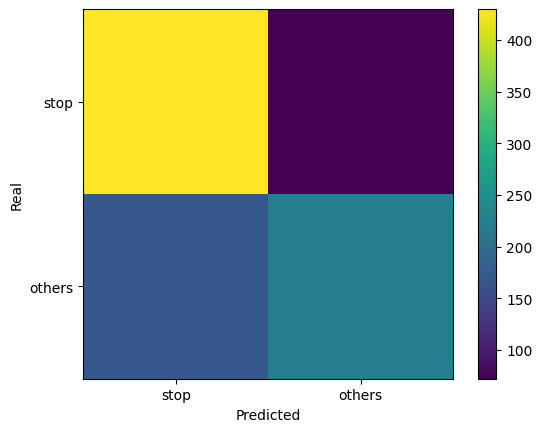

Confusion Matrix for Label warning:
[[784   0]
 [116   0]]



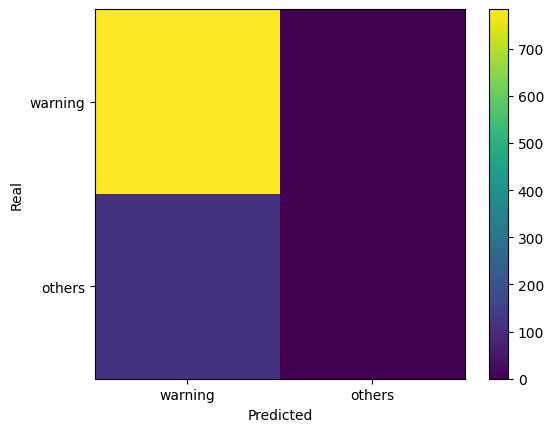

In [7]:
# Create a basic NN classifier with two fully connected layer using PyTorch
# train the model and make predictions
MultiLabelClassifier = NN.MultiLabelClassifier_FC2
y_pred = NN.train_and_pred(features_train, labels_train, features_test, labels_test, MultiLabelClassifier)